# **SALES DATA ANALYSIS**
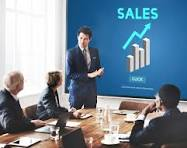

**Objective:** Consider sales dataset and analyse it is a proper way.

**Expectation**: Need a clarity on who is spending more money for shopping incase of gender,age_group,state,occupation,Product_Category	,Marital_Status.

In [ ]:
#nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL=("https://github.com/Taj1920/Data_Analysis/raw/refs/heads/main/sales_data_project/sales_data.csv")
df=pd.read_csv(URL,encoding="ISO-8859-1")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# **Data Cleaning**

In [ ]:
#removing status and unnamed1 columns
df=df.drop(["Status","unnamed1"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
#drop Nan values in amount column
df["Amount"].isnull().sum()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
#handling gender (m--->male, f--->female)
df["Gender"]=df["Gender"].map({'F':"Female",'M':"Male"})
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#handling Marital_Status (0--->single, 1--->married)
df["Marital_Status"]=df["Marital_Status"].map({0:"Single",1:"Married"})
df["Marital_Status"].unique()

array(['Single', 'Married'], dtype=object)

In [ ]:
#handling state column
df["State"]=df["State"].str.replace("Andhra\xa0Pradesh","Andhra Pradesh")
df["State"].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [ ]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#resetting index
df.reset_index(inplace=True)
df=df.drop("index",axis=1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


# **Data Visualization**

In [ ]:
def data_label(a):
 for i in a.containers:
  a.bar_label(i)

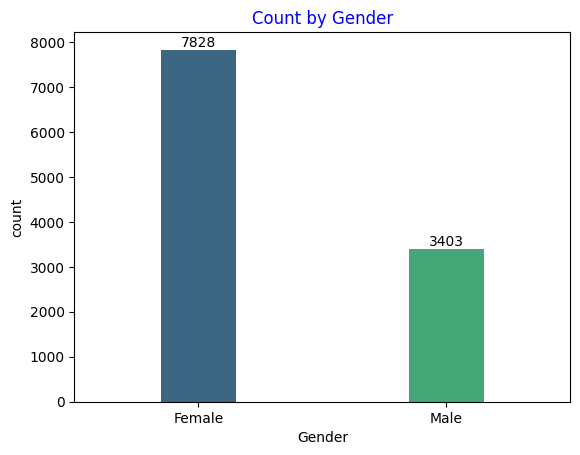

In [ ]:
#count by gender
a=sns.countplot(x="Gender",data=df,hue="Gender",palette="viridis",width=0.3)
plt.title("Count by Gender",color="blue")
data_label(a)

**count of female customer is more compared to male.**

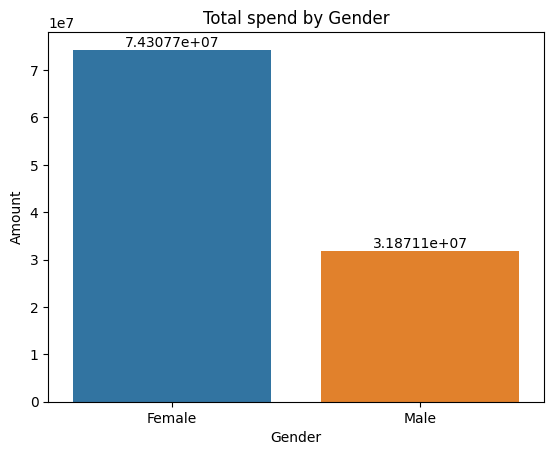

In [ ]:
#Total amount by gender
gender=df.groupby("Gender")["Amount"].sum()
gender=pd.DataFrame(gender).reset_index()
a=sns.barplot(x="Gender",y="Amount",data=gender,hue="Gender")
plt.title("Total spend by Gender")
data_label(a)

**Female are spending more compared to male**

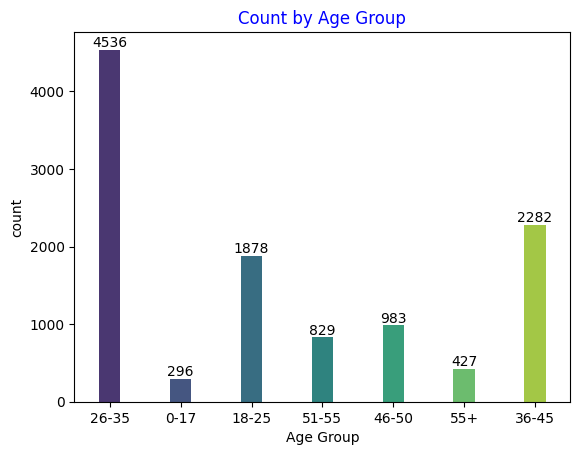

In [ ]:
#count of age group
a=sns.countplot(x="Age Group",data=df,hue="Age Group",palette="viridis",width=0.3)
plt.title("Count by Age Group",color="blue")
data_label(a)

**count of Age group 26-35 is more compared to other age group**

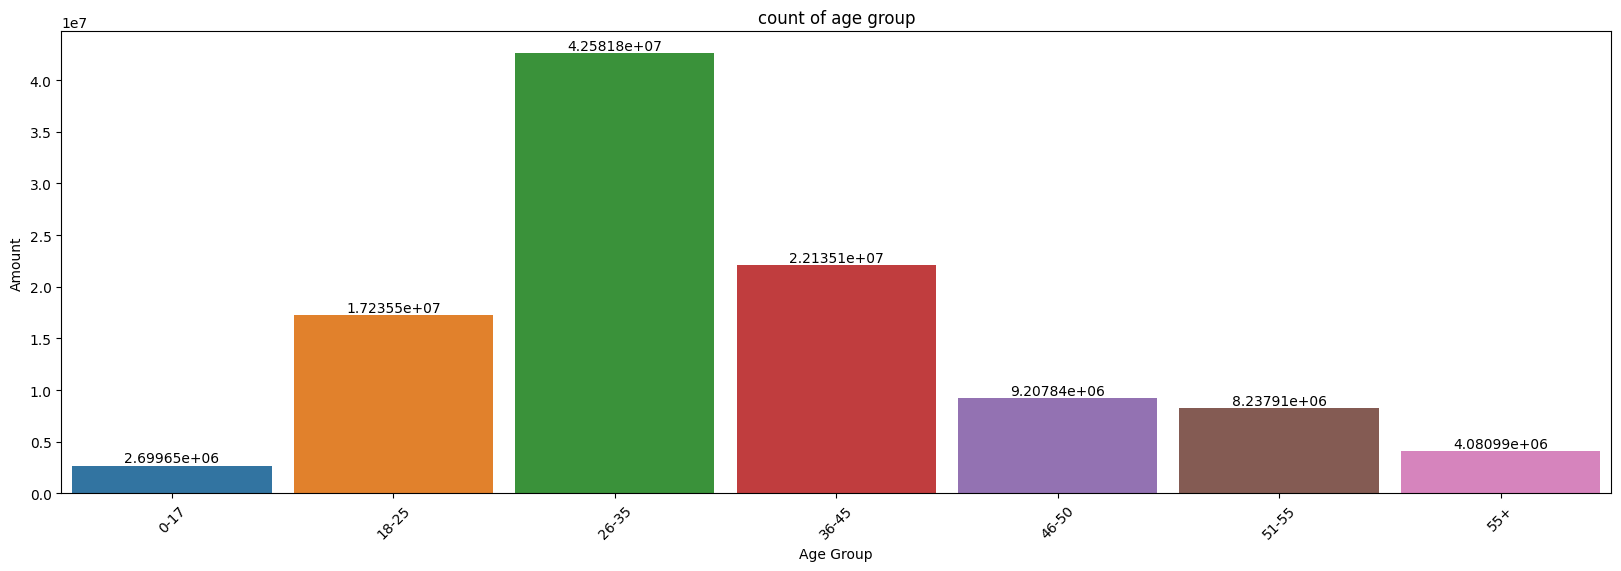

In [123]:
# total of age group
Age_Group=df.groupby("Age Group")["Amount"].sum()
Age_Group=pd.DataFrame(Age_Group).reset_index()
plt.figure(figsize=(20,6))
a=sns.barplot(x="Age Group",y="Amount",data=Age_Group,hue="Age Group",width=0.9)
plt.title("count of age group")
plt.xticks(rotation=45)
data_label(a)

**26-35 age group spending more compared to other age group**

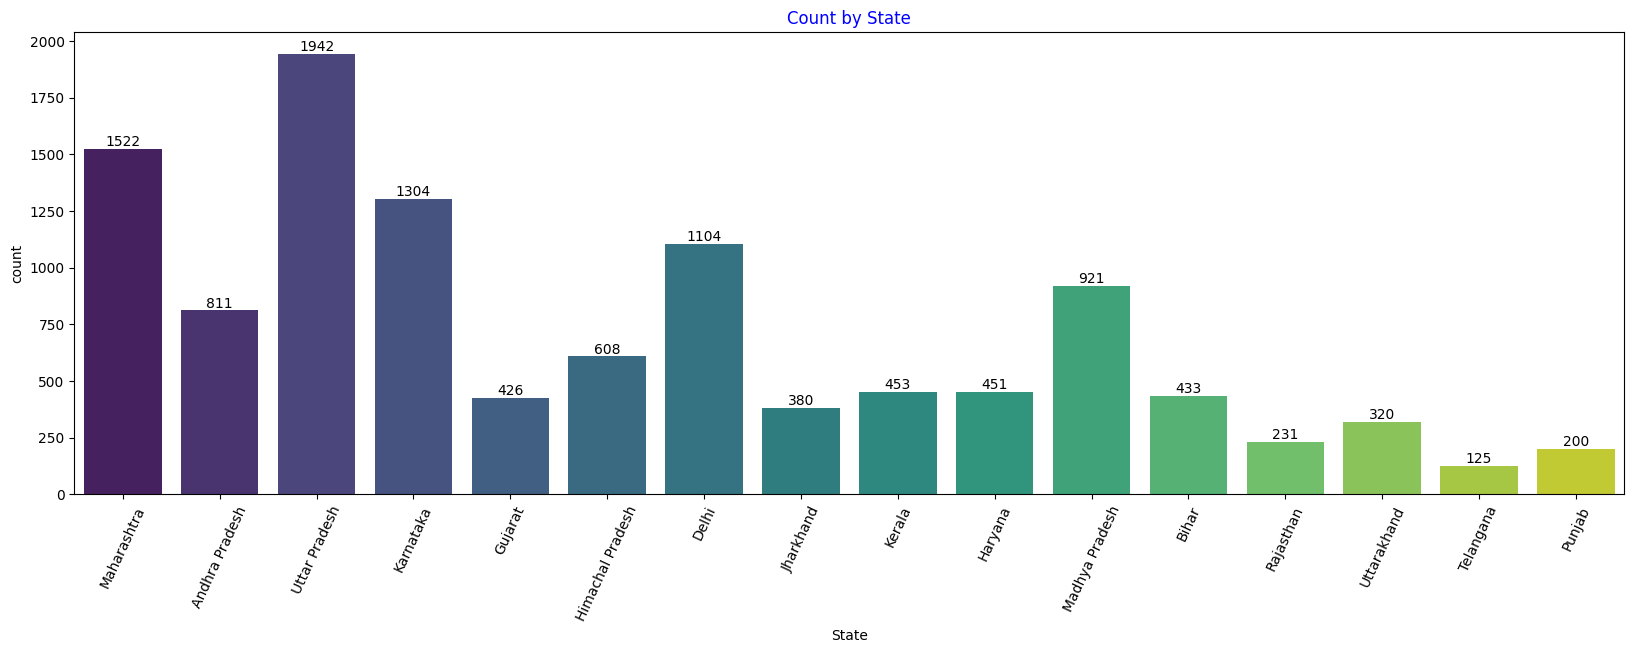

In [125]:
#count of state
plt.figure(figsize=(20,6))
a=sns.countplot(x="State",data=df,hue="State",palette="viridis")
plt.title("Count by State",color="blue")
plt.xticks(rotation=65)
data_label(a)

**the count of customer from Uttarpradesh ,Maharashtra, Karnataka, Delhi, Madhya Pradesh is more Compared TO other States**

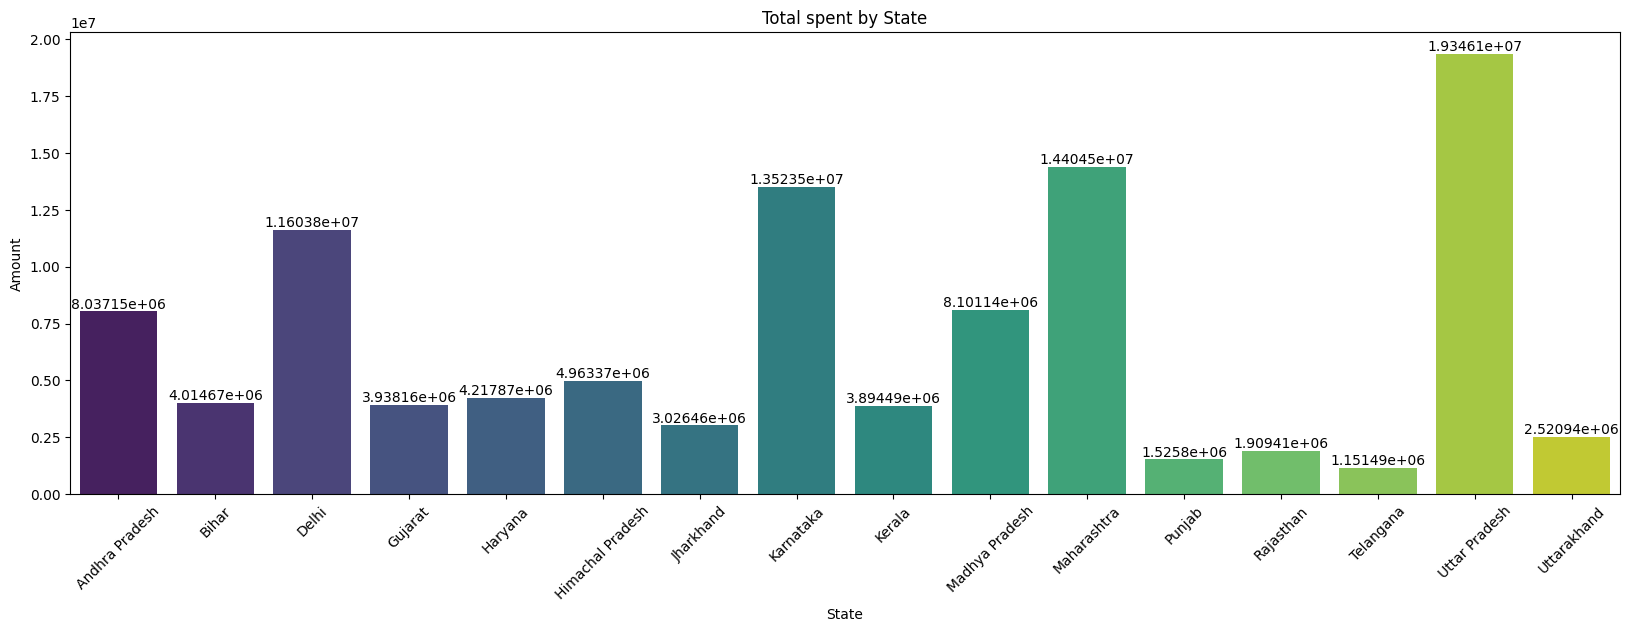

In [127]:
# total of age group
plt.figure(figsize=(20,6))
State=df.groupby("State")["Amount"].sum()
State=pd.DataFrame(State).reset_index()
a=sns.barplot(x="State",y="Amount",data=State,hue="State",palette="viridis")
plt.title("Total spent by State")
plt.xticks(rotation=45)
data_label(a)

**The total spend of customer from Uttarpradesh ,Maharashtra, Karnataka, Delhi, Madhya Pradesh is more Compared tO other States**

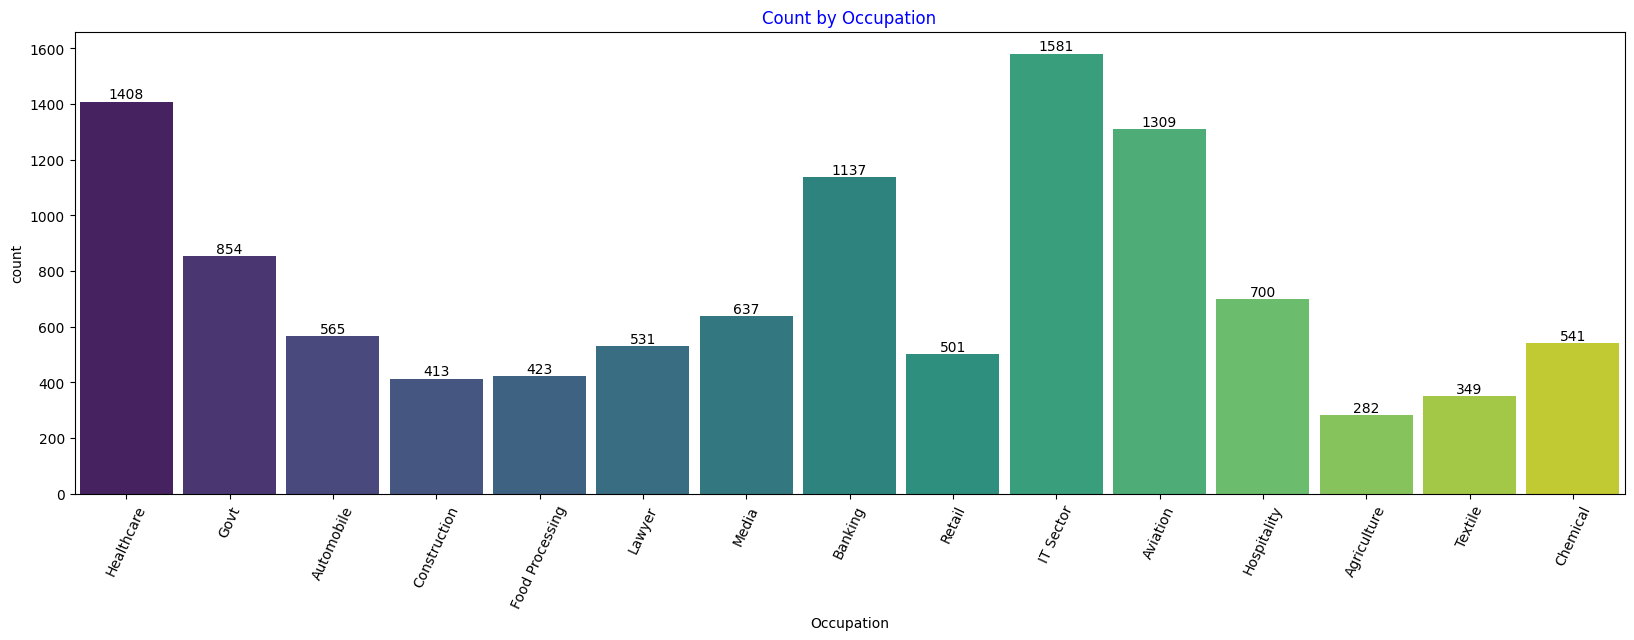

In [128]:
#count of Occupation
plt.figure(figsize=(20,6))
a=sns.countplot(x="Occupation",data=df,hue="Occupation",palette="viridis",width=0.9)
plt.title("Count by Occupation",color="blue")
plt.xticks(rotation=65)
data_label(a)

**count of customer from IT,healthcare,Aviation,Banking,Govt and Hospitality is more compared to others.**

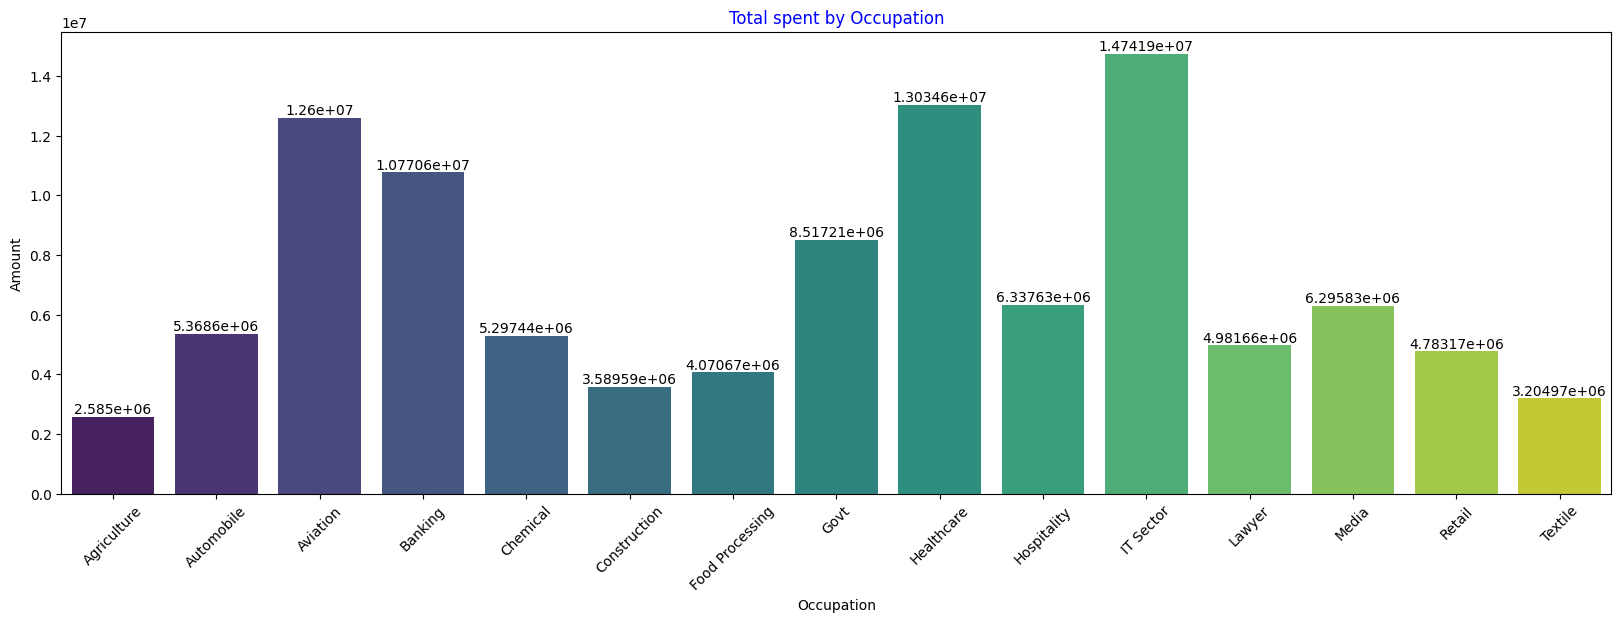

In [131]:
# total of Occupation
plt.figure(figsize=(20,6))
occupation=df.groupby("Occupation")["Amount"].sum()
occupation=pd.DataFrame(occupation).reset_index()
a=sns.barplot(x="Occupation",y="Amount",data=occupation,hue="Occupation",palette="viridis")
plt.title("Total spent by Occupation",color="blue")
plt.xticks(rotation=45)
data_label(a)

**Total spend is more in IT,healthcare,Aviation,Banking,Govt and Hospitality is more compared to others**

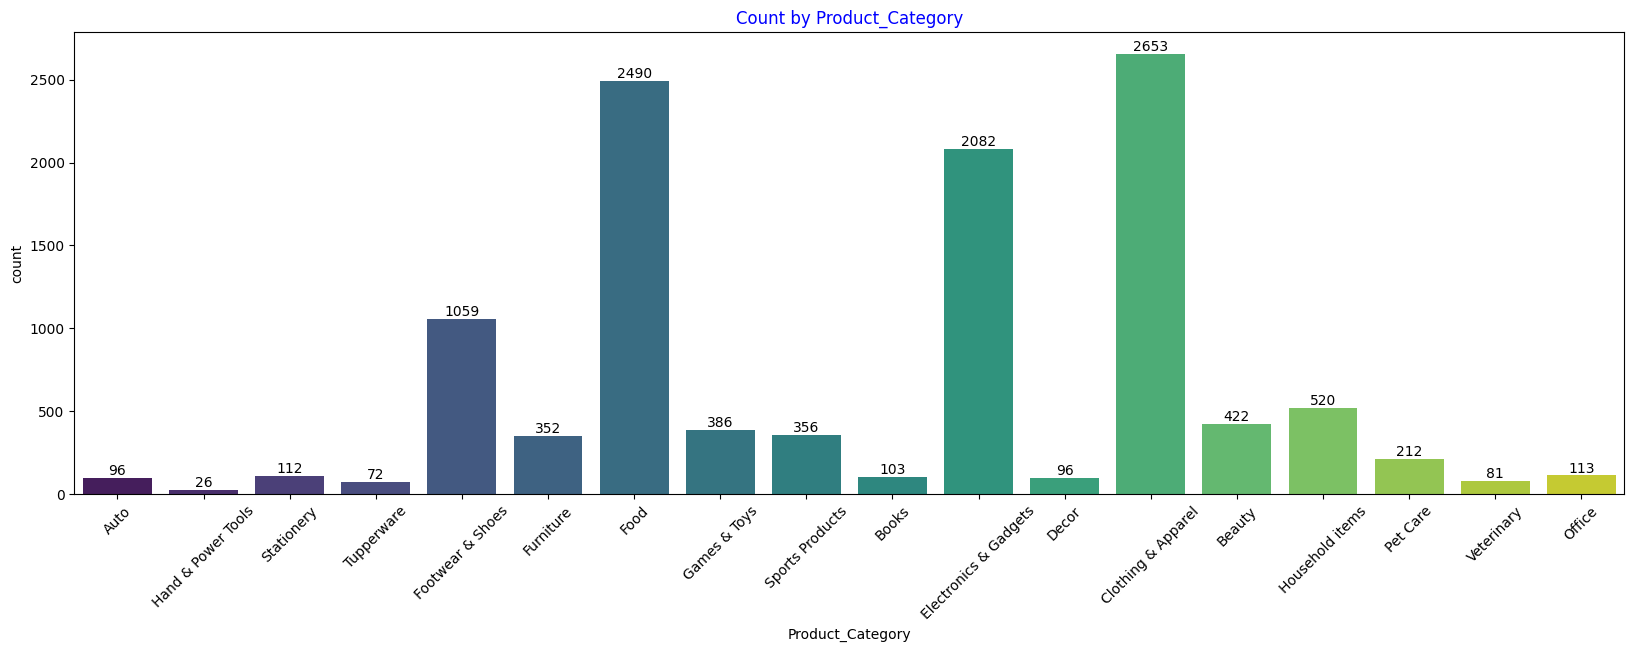

In [133]:
#count of Product_Category
plt.figure(figsize=(20,6))
a=sns.countplot(x="Product_Category",data=df,hue="Product_Category",palette="viridis")
plt.title("Count by Product_Category",color="blue")
plt.xticks(rotation=45)
data_label(a)

**Count is more for clothing and apparel, food, and electronics and gadgets**

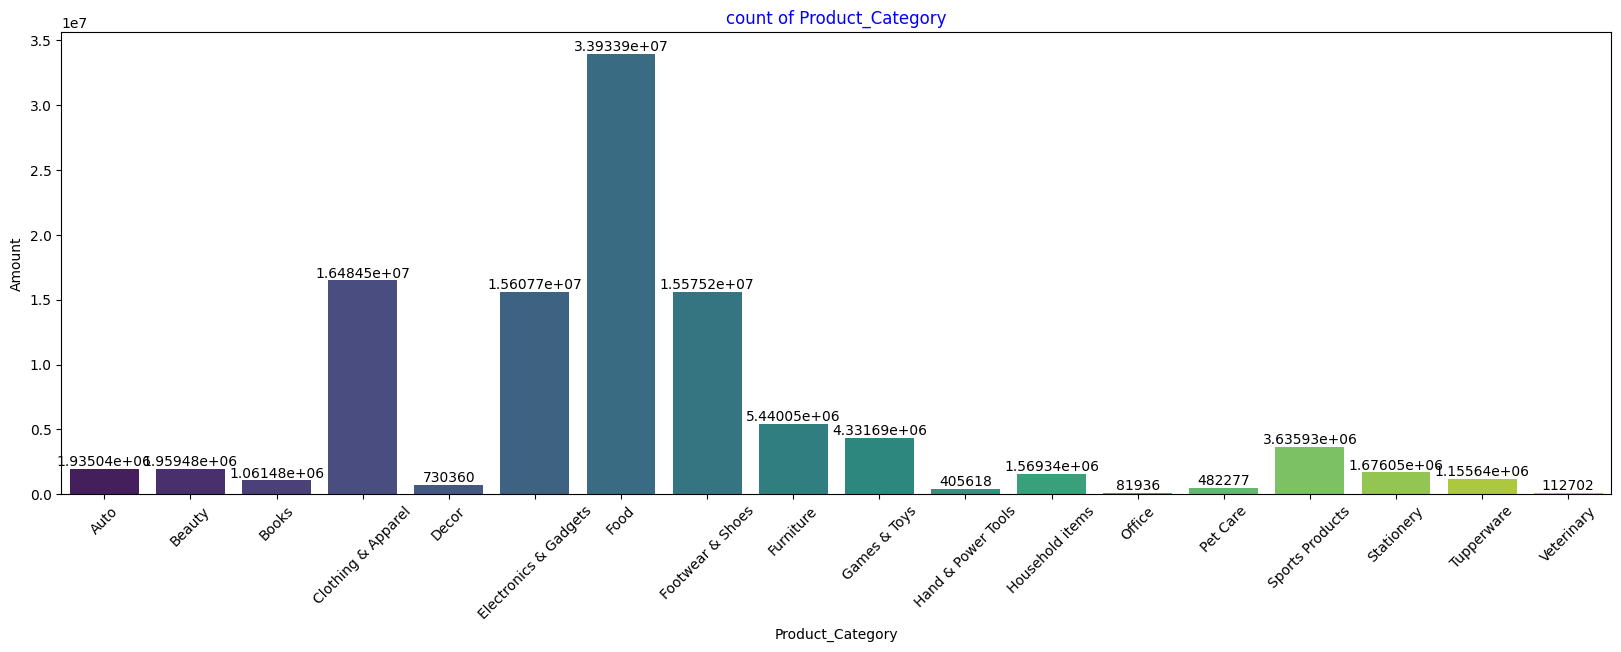

In [136]:
# total of Product_Category
Product_Category=df.groupby("Product_Category")["Amount"].sum()
Product_Category=pd.DataFrame(Product_Category).reset_index()
plt.figure(figsize=(20,6))
a=sns.barplot(x="Product_Category",y="Amount",data=Product_Category,hue="Product_Category",palette="viridis")
plt.title("Total of Product_Category",color="blue")
plt.xticks(rotation=45)
data_label(a)

**More of the people are liking to spend on clothing and apparel, food, and electronics gadgets and footwear and showes**

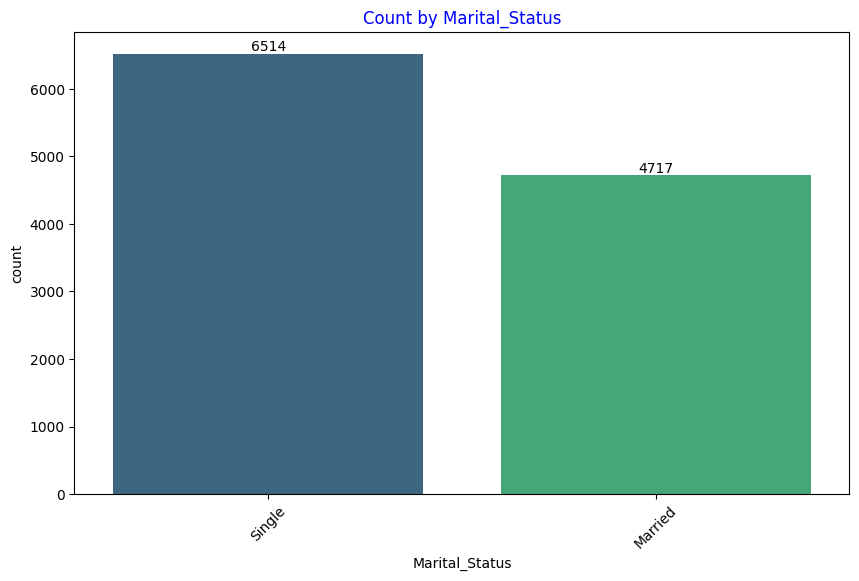

In [138]:
#count of Marital_Status
plt.figure(figsize=(10,6))
a=sns.countplot(x="Marital_Status",data=df,hue="Marital_Status",palette="viridis")
plt.title("Count by Marital_Status",color="blue")
plt.xticks(rotation=45)
data_label(a)

**count of single is more compared to married**

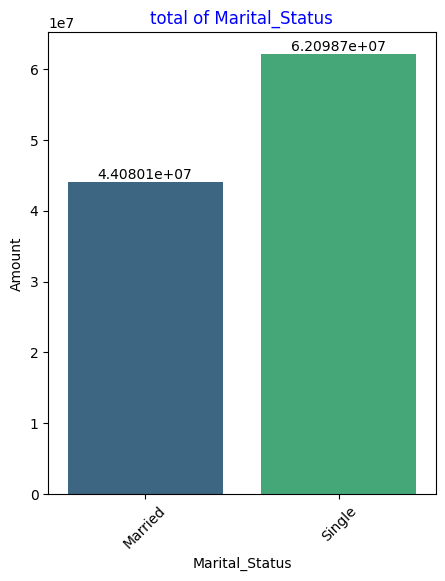

In [142]:
# total of Marital_Status
Marital_Status=df.groupby("Marital_Status")["Amount"].sum()
Marital_Status=pd.DataFrame(Marital_Status).reset_index()
plt.figure(figsize=(5,6))
a=sns.barplot(x="Marital_Status",y="Amount",data=Marital_Status,hue="Marital_Status",palette="viridis")
plt.title("total of Marital_Status",color="blue")
plt.xticks(rotation=45)
data_label(a)

**Customer who are single are spending more on shopping than married**

**Conclusion:**

1)Female are spending more compared to male.

2)26-35 age group spending more compared to other age group

3)The total spend of customer from Uttarpradesh ,Maharashtra, Karnataka, Delhi, Madhya Pradesh is more Compared tO other States

4)Total spend is more in IT,healthcare,Aviation,Banking,Govt and Hospitality is more compared to others

5)More of the people are liking to spend on clothing and apparel, food, and electronics gadgets and footwear and showes

6)Customer who are single are spending more on shopping than married